# FAKE-REAL NEWS CLASSIFICATION USING RNN

In [1]:
# imports
import numpy as np
import pandas as pd

In [2]:
# reading the data
df_real = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [3]:
# visualizing first few rows
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# visualizing first few rows
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# setting labels
df_real['Target'] = 1
df_fake['Target'] = 0

In [6]:
# concatenating both the dataframes into a single dataframe and shuffling the dataframe
df = pd.concat([df_real, df_fake], axis=0, join="inner")
df = df.sample(frac=1).reset_index(drop=True)
print("Total number of news records : " + str(len(df)))

Total number of news records : 44898


In [7]:
df.head(20)

,title,text,subject,date,Target
0,U.S. will circulate resolution on North Korea ...,NEW YORK (Reuters) - The U.S. envoy to the Uni...,worldnews,"September 4, 2017",1
1,Viral Video Captures The Importance Of Invest...,"Released in September 2013, this short video a...",News,"January 20, 2016",0
2,"DESPERATE: Trump Doubles Down On Wiretap Lie,...","Usually, if you re in a hole you stop digging ...",News,"March 5, 2017",0
3,"EU to press May at summit, UK dismisses Brexit...","GOTHENBURG, Sweden (Reuters) - European Union ...",worldnews,"November 16, 2017",1
4,"FIRED! #NeverTrumper, Close Friend Of Reince P...",Many people were wondering why the White House...,politics,"Mar 31, 2017",0
5,Four U.S. states sue Interior Department over ...,NEW YORK (Reuters) - Four U.S. states have sue...,politicsNews,"May 10, 2017",1
6,Clinton urges renewed 'fight for values',WASHINGTON (Reuters) - Defeated Democratic pre...,politicsNews,"November 17, 2016",1
7,Trump’s Campaign CEO LITERALLY Ordered His Mi...,"Steve Bannon, Trump s campaign CEO who was the...",News,"October 11, 2016",0
8,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",0
9,Trump considering four FBI officials as interi...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"May 10, 2017",1


# Data Analysis

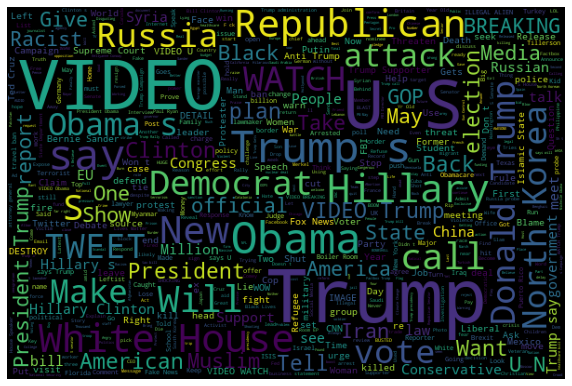

In [8]:
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px

wordcloud = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=80, max_words=5000,
                      width = 600, height = 400,
                      background_color='black').generate(' '.join(txt for txt in df["title"]))
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

<AxesSubplot:>

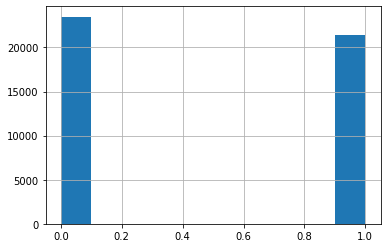

In [9]:
df['Target'].hist()

It can be observed that labels are reasonably balanced

In [10]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.bar(x = np.unique(df["subject"]),
y = [list(df["subject"]).count(i) for i in np.unique(df["subject"])] , 
            color = np.unique(df["subject"]),
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Subject")
fig.update_yaxes(title = "Number of Rows")
fig.update_layout(showlegend = False,
    title = {
        'text': 'News Subject Distribution',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# Finding Fake News Based on Title

In [11]:
# only consider title and target column for classification
y_title = df['Target']
X_title = df['title']

In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import metrics
num_words = 10000
max_len = 200

In [13]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=num_words+1)
tokenizer.fit_on_texts(X_title)
X_title_sequenced = tokenizer.texts_to_sequences(X_title)
X_title_padded = keras.preprocessing.sequence.pad_sequences(X_title_sequenced, maxlen=max_len, padding="post", truncating="post")

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_title_padded, y_title, test_size=0.4, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=1)

In [15]:
model_title = keras.Sequential([keras.layers.Embedding(num_words+1, 16, input_length=max_len),
                          keras.layers.Bidirectional(keras.layers.LSTM(16)),
                          keras.layers.Dense(8, activation="relu"),
                          keras.layers.Dense(1, activation="sigmoid")])

In [16]:
model_title.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [17]:
history = model_title.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
842/842 [==============================] - 71s 75ms/step - loss: 0.3274 - accuracy: 0.8601 - val_loss: 0.0947 - val_accuracy: 0.9652
Epoch 2/5
842/842 [==============================] - 58s 69ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0931 - val_accuracy: 0.9655
Epoch 3/5
842/842 [==============================] - 59s 69ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0956 - val_accuracy: 0.9658
Epoch 4/5
842/842 [==============================] - 61s 73ms/step - loss: 0.0156 - accuracy: 0.9957 - val_loss: 0.1365 - val_accuracy: 0.9646
Epoch 5/5
842/842 [==============================] - 61s 73ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.1388 - val_accuracy: 0.9638


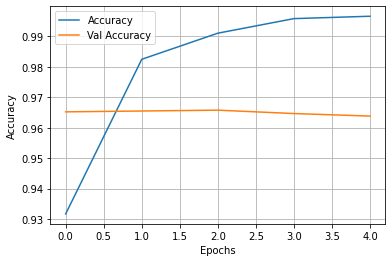

In [18]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy, label="Accuracy")
plt.plot(history_df.val_accuracy, label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

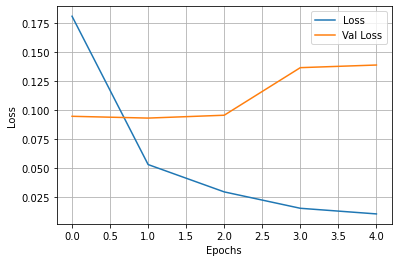

In [19]:
plt.plot(history_df.loss, label="Loss")
plt.plot(history_df.val_loss, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [20]:
y_pred = (model_title.predict(X_test) > 0.5).astype("int32")
metrics.accuracy_score(y_pred, y_test)

0.9654092427616926

# Finding Fake News Based on Title and Text both

In [21]:
# consider title, text and target column for classification
y = df['Target'] 
X = df['title'] + " " + df['text']

In [22]:
num_words = 10000
max_len = 500
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words+1)
tokenizer.fit_on_texts(X)
X_sequenced = tokenizer.texts_to_sequences(X)
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_sequenced, maxlen=max_len, padding="post", truncating="post")

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_title, test_size=0.4, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=1)

In [24]:
model = keras.Sequential([keras.layers.Embedding(num_words+1,16,input_length=500),
                         keras.layers.Bidirectional(keras.layers.LSTM(32)),
                        keras.layers.Dense(16,activation="relu"),
                        keras.layers.Dense(1,activation="sigmoid")])

In [25]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
842/842 [==============================] - 181s 209ms/step - loss: 0.2800 - accuracy: 0.8787 - val_loss: 0.0045 - val_accuracy: 0.9986
Epoch 2/5
842/842 [==============================] - 178s 212ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 3/5
842/842 [==============================] - 175s 208ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0029 - val_accuracy: 0.9992 ETA: 
Epoch 4/5
842/842 [==============================] - 175s 207ms/step - loss: 1.0616e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9983
Epoch 5/5
842/842 [==============================] - 174s 206ms/step - loss: 4.9337e-04 - accuracy: 0.9999 - val_loss: 0.0055 - val_accuracy: 0.9992


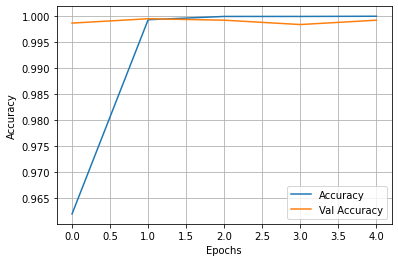

In [27]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy, label="Accuracy")
plt.plot(history_df.val_accuracy, label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

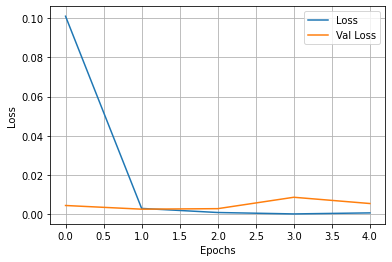

In [28]:
plt.plot(history_df.loss, label="Loss")
plt.plot(history_df.val_loss, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [29]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
metrics.accuracy_score(y_pred, y_test)

0.9991648106904232